In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Importing CSV DATA

In [2]:
data =  pd.read_csv('housing.csv')

In [3]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


### Checking NaN values columns

In [4]:
nan_columns = data.columns[data.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['total_bedrooms']


### Handling NaN values Columns

In [5]:
median_total_bedrooms = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)
data.dropna(inplace=True)

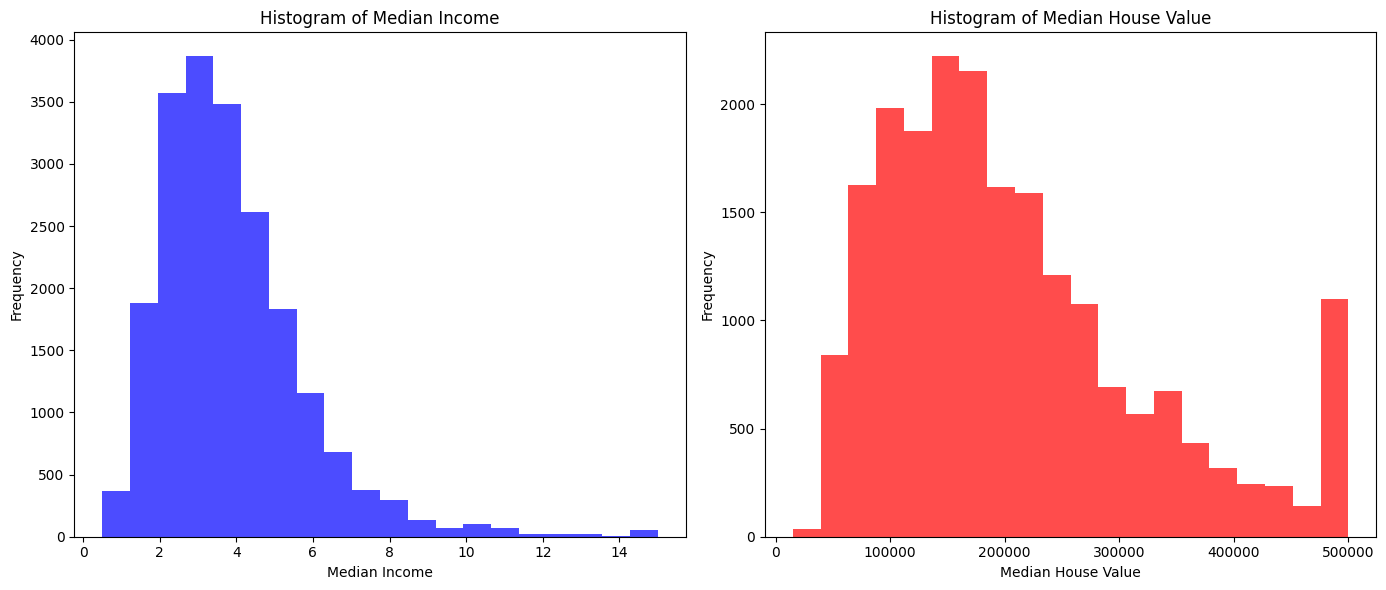

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(data['median_income'], bins=20, color='blue', alpha=0.7)
ax1.set_xlabel('Median Income')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Median Income')

ax2.hist(data['median_house_value'], bins=20, color='red', alpha=0.7)
ax2.set_xlabel('Median House Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Median House Value')

plt.tight_layout()
plt.show()

### Splitting Independent Variable

In [7]:
X = data[['median_income']]
y = data['median_house_value']

### Splitting Training and Testing Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Making a Linear Regression Model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predicting the X test values

In [10]:
y_pred = model.predict(X_test)

In [11]:
X_test_reset_index = X_test.reset_index(drop=True)

### Scatter Plot of Median Income  vs Median House Value

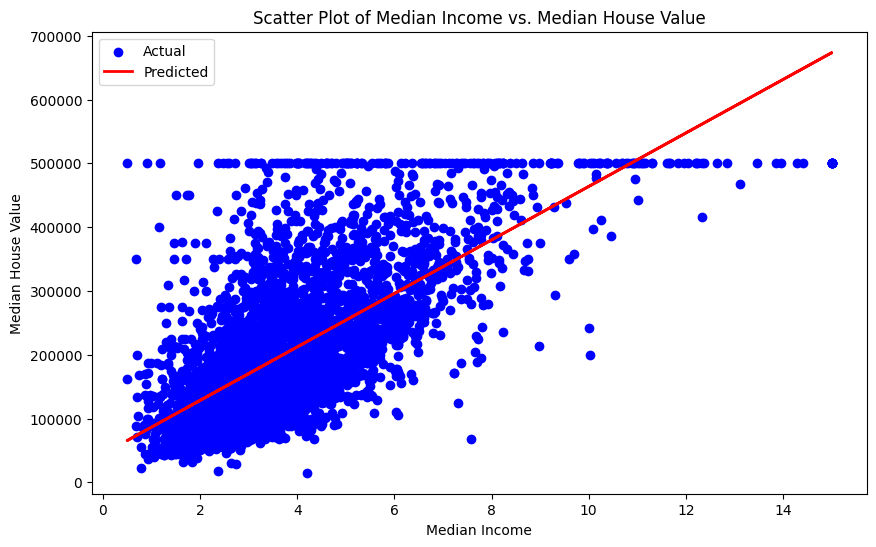

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reset_index, y_test, color='blue', label='Actual')
plt.plot(X_test_reset_index['median_income'], y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Scatter Plot of Median Income vs. Median House Value')
plt.legend()
plt.show()
r2 = r2_score(y_test, y_pred)

In [13]:
print(f"R-squared Score: {r2*100}%")

R-squared Score: 45.88591890384666%
